## Student Information
Name: 余邦瑋

---


## **Instruction**
  
Welcome to NEAF DIP workshop!  
Here we prepare some widely used methods to let you practice, including:
1. Histogram Equalization
2. Mean blur, Median blur, Gaussian blur
3. Binary
4. HSV filter
5. Morphological: erosion, dilation, open, close
6. Find contours

Those skills are very powerful and important skills, please enjoy learning and put them into good use :)

---

## **1. Histogram Equalization**
Histogram is the method to enhance image contrast.  
Please show the image grayscale histogram and do the equlization, and show the image result and histogram equalization result.  

<img src="md_picture/1.png" width="60%" heught="60%">

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

True

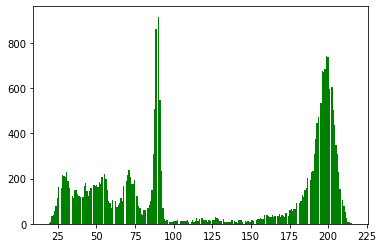

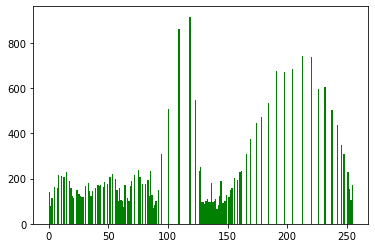

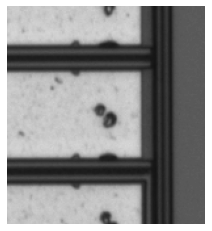

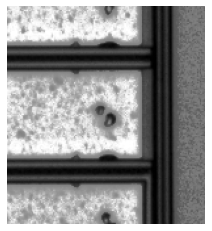

In [2]:
img_ori = cv2.imread('input/binary_task1.bmp', cv2.IMREAD_GRAYSCALE) # Read image as gray.

# """
plt.figure()
plt.hist(img_ori.flatten(),225, density=False, facecolor = 'g')

res = cv2.equalizeHist(img_ori)
plt.figure()
plt.hist(res.flatten(),225, density=False, facecolor = 'g')

plt.figure()
plt.imshow(img_ori,plt.cm.gray,vmin=0,vmax=255)
plt.axis('off')

plt.figure()
plt.imshow(res,plt.cm.gray,vmin=0,vmax=255)
plt.axis('off')
# """

# save result
cv2.imwrite('output/img_ori.bmp', img_ori)
cv2.imwrite('output/img_equa.bmp', res)

_keywords: plt.hist, cv2.equalizeHist, cv2.calcHist_

---

## **2. Mean blur, Gaussian blur, Median blur**
Blur is a method to deal with the noise on the image.
Please input the image and use different kernel size to show blur result.

<img src="md_picture/2.png" width="60%" heught="60%">
<img src="md_picture/3.png" width="60%" heught="60%">

True

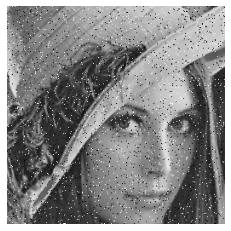

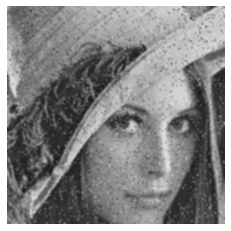

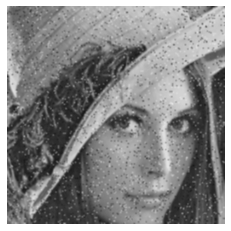

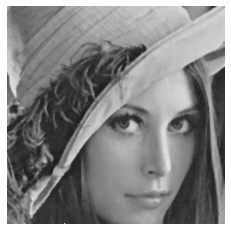

In [3]:
img_noise = cv2.imread('input/lena_noise.png', cv2.IMREAD_GRAYSCALE)

# Blur the image by three methods.

# """
plt.figure()
plt.imshow(img_noise,plt.cm.gray,vmin=0,vmax=255)
plt.axis('off')

img_mean_blur = cv2.blur(img_noise, (3,3))
plt.figure()
plt.imshow(img_mean_blur,plt.cm.gray,vmin=0,vmax=255)
plt.axis('off')

img_gaussian_blur = cv2.GaussianBlur(img_noise, (3,3), 0)
plt.figure()
plt.imshow(img_gaussian_blur,plt.cm.gray,vmin=0,vmax=255)
plt.axis('off')

img_median_blur =  cv2.medianBlur(img_noise, 3)
plt.figure()
plt.imshow(img_median_blur,plt.cm.gray,vmin=0,vmax=255)
plt.axis('off')

# """

# save result
cv2.imwrite('output/img_mean_blur.png', img_mean_blur)
cv2.imwrite('output/img_gaussian_blur.png', img_gaussian_blur)
cv2.imwrite('output/img_median_blur.png', img_median_blur)

### Question:
1. What is the difference between three methods? When to use them?
2. What is the difference if the kernel size changes?  


_keywords: cv2.blur, cv2.GaussianBlur, cv2.medianBlur_

1. 

---

## **3. Binary**
Binary is a method to transfer greyscale to 0 (black) and 255 (white) only.  
Please do the image binary to seperate pad and background.  

<img src="md_picture/4.png" width="60%" heught="60%">

True

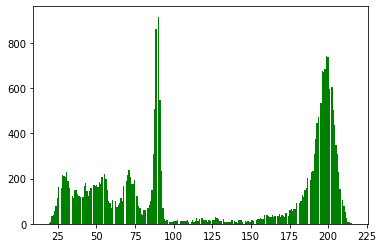

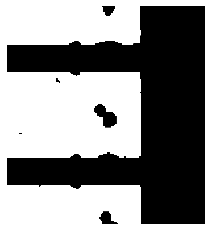

In [4]:
binary1 = cv2.imread('input/binary_task1.bmp', cv2.IMREAD_GRAYSCALE)

# Do the image binary to seperate pad and background

#"""
plt.figure()
plt.hist(binary1.flatten(),225, density=False, facecolor = 'g')

ret,thres1 = cv2.threshold(binary1,150,255,cv2.THRESH_BINARY)
plt.figure()
plt.imshow(thres1,plt.cm.gray,vmin=0,vmax=1)
plt.axis('off')
#"""

# save result
cv2.imwrite('output/binary_task1.bmp', thres1)

True

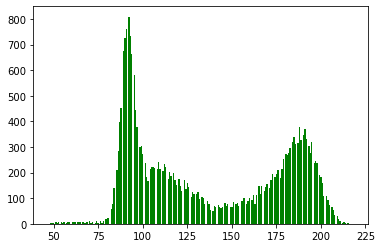

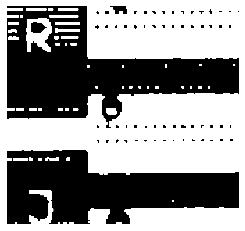

In [5]:
binary2 = cv2.imread('input/binary_task2.bmp', cv2.IMREAD_GRAYSCALE)

# Do the image binary to seperate pad and background

#"""
plt.figure()
plt.hist(binary2.flatten(),225, density=False, facecolor = 'g')

ret,thres2 = cv2.threshold(binary2,130,255,cv2.THRESH_BINARY)
plt.figure()
plt.imshow(thres2,plt.cm.gray,vmin=0,vmax=1)
plt.axis('off')
#"""

# save result
cv2.imwrite('output/binary_task2.bmp', thres2)

True

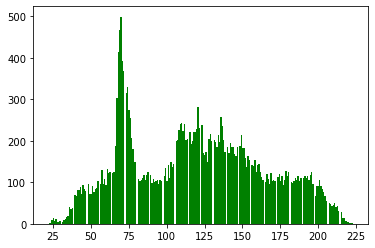

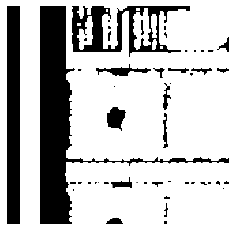

In [6]:
binary3 = cv2.imread('input/binary_task3.bmp', cv2.IMREAD_GRAYSCALE)

# Do the image binary to seperate pad and background

#"""
plt.figure()
plt.hist(binary3.flatten(),225, density=False, facecolor = 'g')

ret,thres3 = cv2.threshold(binary3,90,255,cv2.THRESH_BINARY)
plt.figure()
plt.imshow(thres3,plt.cm.gray,vmin=0,vmax=1)
plt.axis('off')
#"""

# save result
cv2.imwrite('output/binary_task3.bmp', thres3)

### Questions:
1. What are the limits of this methods?
2. What if the light source is not uniform? Is this method still work? How to improve it?  

_keywords: cv2.threshold_

---

## **4. HSV filter**
This method could extract the the interested part by color.  
Please crop the yellow or blue boxes and its surrounding in the image.

<img src="md_picture/5.png" width="30%" heught="30%">

### Steps:
1. Transfer color to HSV.
2. Setting the color range and filter the image. (output the color image in the setting range)
3. Binary the image, find the left-top and right-bottom coordinate.
4. Crop the image by the coordinate.  

- Noted: Blur, histogram equalization methods could be used if needed.  

True

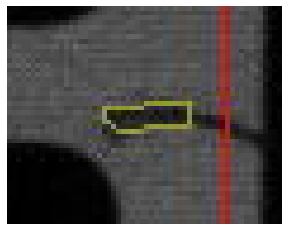

In [7]:
# Yellow box.
yellow = cv2.imread('input/yellow.jpg')

# Step 1. Transfer color to HSV
yellow_HSV = cv2.cvtColor(yellow, cv2.COLOR_BGR2HSV)
yellow = cv2.cvtColor(yellow, cv2.COLOR_BGR2RGB)
# Step 2. Setting the color range and filter the image.
[h,w,d] = yellow.shape
min_x = w
min_y = h
max_x = 0
max_y = 0
yellow_binary = np.zeros((h,w))
color_range = [30,149,150]
threhold = [4,50,50]
# Step 3. Binary the image, find the left-top and right-bottom coordinate (x, y, w, h) or (x1, x2, y1, y2).
for height in range(h):
    for width in range(w):
        if np.abs(yellow_HSV[height,width,0]-color_range[0]) < threhold[0] and \
           np.abs(yellow_HSV[height,width,1]-color_range[1]) < threhold[1] and \
           np.abs(yellow_HSV[height,width,2]-color_range[2]) < threhold[2]:
            yellow_HSV[height,width] = 1
            if (width < min_x):
                min_x = width
                
            if (height < min_y):
                min_y = height
                
            if (width > max_x):
                max_x = width
                
            if (height > max_y):
                max_y = height
# Step 4. Crop the image by the coordinate.
x = min_x
y = min_y
w = max_x - min_x
h = max_y - min_y
crop_edge = 20  # surrounding 20 pixels 
cropHSV_yellow = yellow[y-crop_edge: y+h+crop_edge, x-crop_edge: x+w+crop_edge]   # take (x, y, w, h) as example.
plt.figure()
plt.imshow(cropHSV_yellow,vmin=0,vmax=255)
plt.axis('off')
# save result
cv2.imwrite('output/cropHSV_yellow.jpg', cropHSV_yellow)

True

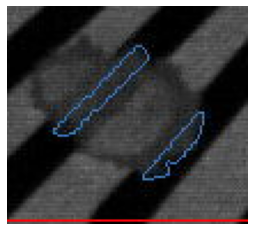

In [8]:
# Blue box.
blue = cv2.imread('input/blue.jpg')
# Step 1. Transfer color to HSV
blue_HSV = cv2.cvtColor(blue, cv2.COLOR_BGR2HSV)
blue = cv2.cvtColor(blue, cv2.COLOR_BGR2RGB)
# Step 2. Setting the color range and filter the image.
[h,w,d] = blue.shape
min_x = w
min_y = h
max_x = 0
max_y = 0
blue_binary = np.zeros((h,w))
color_range = [112,149,150]
threhold = [12,50,50]
# Step 3. Binary the image, find the left-top and right-bottom coordinate (x, y, w, h) or (x1, x2, y1, y2).
for height in range(h):
    for width in range(w):
        if np.abs(blue_HSV[height,width,0]-color_range[0]) < threhold[0] and \
           np.abs(blue_HSV[height,width,1]-color_range[1]) < threhold[1] and \
           np.abs(blue_HSV[height,width,2]-color_range[2]) < threhold[2]:
            blue_binary[height,width] = 1
            if (width < min_x):
                min_x = width
                
            if (height < min_y):
                min_y = height
                
            if (width > max_x):
                max_x = width
                
            if (height > max_y):
                max_y = height
# Step 4. Crop the image by the coordinate.
x = min_x
y = min_y
w = max_x - min_x
h = max_y - min_y
crop_edge = 20  # surrounding 20 pixels 
cropHSV_blue = blue[y-crop_edge: y+h+crop_edge, x-crop_edge: x+w+crop_edge]   # take (x, y, w, h) as example.

plt.figure()
plt.imshow(cropHSV_blue,vmin=0,vmax=255)
plt.axis('off')

# save result
cv2.imwrite('output/cropHSV_blue.jpg', cropHSV_blue)

---

## **5. Morphological: erosion, dilation, open, close**

Those methods help to denoise, enhance the features.   
Please use these methods to fill up the lines of the image created in the previous section.

<img src="md_picture/6.png" width="60%" heught="60%">

True

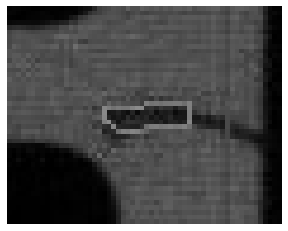

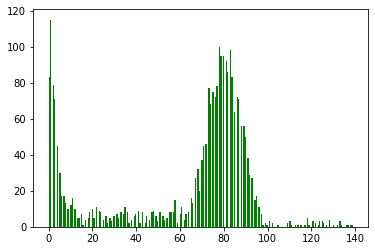

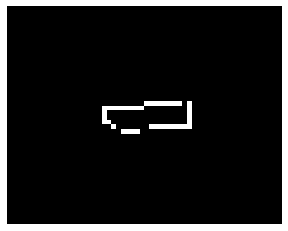

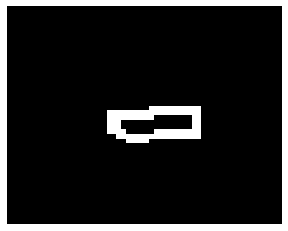

In [9]:
hsv_yellow = cv2.imread('output/cropHSV_yellow.jpg')
hsv_yellow = cv2.cvtColor(hsv_yellow, cv2.COLOR_BGR2RGB)
[h,w,d] = hsv_yellow.shape
yellow_gray = np.zeros((h,w))
color_range = [143,42,82]
threshold = [20,20,20]
for height in range(h):
    for width in range(w):
        if np.abs(hsv_yellow[height,width,0]-color_range[0]) < threshold[0] and \
           np.abs(hsv_yellow[height,width,1]-color_range[1]) < threshold[1] and \
           np.abs(hsv_yellow[height,width,2]-color_range[2]) < threshold[2]:
            hsv_yellow[height,width,:] = [50,50,50]
        yellow_gray[height,width] = int(np.sum(hsv_yellow[height,width,:]) / 3)


# Try to use erosion, dilation, open, close to fill up the lines.
plt.figure()
plt.imshow(yellow_gray,plt.cm.gray,vmin=0,vmax=255)
plt.axis('off')

plt.figure()
plt.hist(yellow_gray.flatten(),225, density=False, facecolor = 'g')

ret,yellow_binary = cv2.threshold(yellow_gray,110,255,cv2.THRESH_BINARY)
plt.figure()
plt.imshow(yellow_binary,plt.cm.gray,vmin=0,vmax=1)
plt.axis('off')


kernel = np.ones((2, 2), np.uint8)
yellow_binary = cv2.dilate(yellow_binary, kernel, iterations = 2)
result = cv2.erode(yellow_binary, kernel, iterations = 1)
plt.figure()
plt.imshow(result,plt.cm.gray,vmin=0,vmax=1)
plt.axis('off')

# save result
cv2.imwrite('output/morpho_yellow.jpg', result)

True

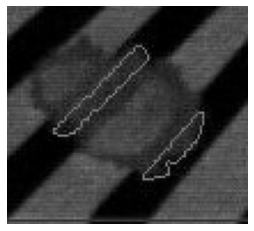

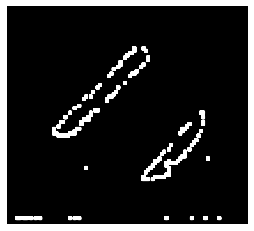

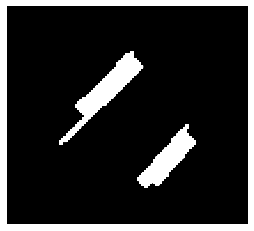

In [10]:
hsv_blue = cv2.imread('output/cropHSV_blue.jpg')
hsv_blue = cv2.cvtColor(hsv_blue, cv2.COLOR_BGR2RGB)
[h,w,d] = hsv_blue.shape
blue_gray = np.zeros((h,w))
color_range = [143,42,82]
threshold = [10,10,10]
for height in range(h):
    for width in range(w):
        if np.abs(hsv_blue[height,width,0]-color_range[0]) < threshold[0] and \
           np.abs(hsv_blue[height,width,1]-color_range[1]) < threshold[1] and \
           np.abs(hsv_blue[height,width,2]-color_range[2]) < threshold[2]:
            hsv_blue[height,width,:] = [50,50,50]
        blue_gray[height,width] = int(np.sum(hsv_blue[height,width,:]) / 3)


# Try to use erosion, dilation, open, close to fill up the lines.

plt.figure()
plt.imshow(blue_gray,plt.cm.gray,vmin=0,vmax=255)
plt.axis('off')

ret,blue_binary = cv2.threshold(blue_gray,110,255,cv2.THRESH_BINARY)

plt.figure()
plt.imshow(blue_binary,plt.cm.gray,vmin=0,vmax=1)
plt.axis('off')


kernel =  np.array([[0, 0, 1],
                    [0, 1, 0]],
                    dtype=np.uint8)

blue_binary = cv2.erode(blue_binary, kernel, iterations = 1)
blue_binary = cv2.dilate(blue_binary, kernel, iterations = 3)
# kernel = np.ones((3,3), np.uint8)
kernel =  np.array([[0, 1, 0],
                    [1, 1, 1],
                    [0, 1, 0]], dtype=np.uint8)
result = cv2.morphologyEx(blue_binary, cv2.MORPH_CLOSE, kernel, iterations=5)

plt.figure()
plt.imshow(result,plt.cm.gray,vmin=0,vmax=1)
plt.axis('off')

# # save result
cv2.imwrite('output/morpho_blue.jpg', result)

_keywords: cv2.erode, cv2.dilate, cv2.morpholopyEx_

---

## **6. Find countours**

Use package to find the contours in the image.

Practice:
1. Find the pad and probemark contours in the pad series images.
2. Calculate the countours area.

<img src="md_picture/7.png" width="60%" heught="60%">

The pad area is  6486.0
The probe mark area is  177.0


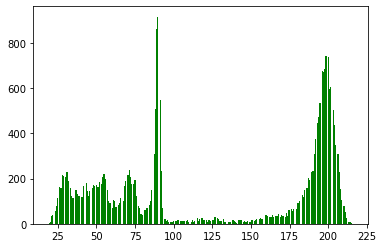

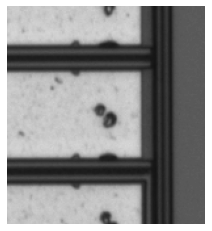

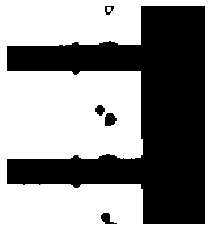

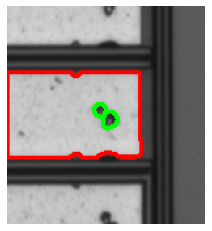

In [11]:
pad_task1 = cv2.imread('input/binary_task1.bmp')
pad_task1_gray = cv2.cvtColor(pad_task1, cv2.COLOR_BGR2GRAY)

# Find the pad and probemark contours and draw.
plt.figure()
plt.hist(pad_task1_gray.flatten(), 255, density=False, facecolor='g')
plt.figure()
plt.imshow(pad_task1_gray,plt.cm.gray,vmin=0,vmax=255)
plt.axis('off')

pad_area = 0
probemark_area = 0

ret,pad_task1_binary = cv2.threshold(pad_task1_gray,110,255,cv2.THRESH_BINARY)
plt.figure()
plt.imshow(pad_task1_binary,plt.cm.gray,vmin=0,vmax=1)
plt.axis('off')


contours, hierarchy = cv2.findContours(pad_task1_binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for i, contour in enumerate(contours):
    if hierarchy[0][i][3] == -1 :  # 外部輪廓
        color = (255, 0, 0) 
        for point in contour:
            x, y = point[0]
            if 40 <= y <= 120:
                pad_area += cv2.contourArea(contour) 
                cv2.drawContours(pad_task1, [contour], -1, color, 2)
                break
    else:
        color = (0, 255, 0) 
        for point in contour:
            x, y_ = point[0]
            if 40 <= y <= 120:
                probemark_area += cv2.contourArea(contour)
                cv2.drawContours(pad_task1, [contour], -1, color, 2)
                break

result = pad_task1
plt.figure()
plt.imshow(result,vmin=0,vmax=255)
plt.axis('off')

# save and print result
cv2.imwrite('output/pad_task1_cont.bmp', result)
print('The pad area is ', pad_area)
print('The probe mark area is ', probemark_area)

_keywords: cv2.findContours, cv2.contourArea_

---

### **Extra Challenge**

Try to find the contours of circular workspace in the image.  
You can use other DIP methods from other packages.

<img src="md_picture/8.png" width="50%" height="50%">

- Hint : The light source isn't uniform, try to eliminate the the influence of the light source.

True

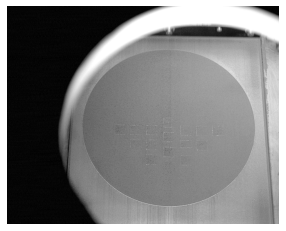

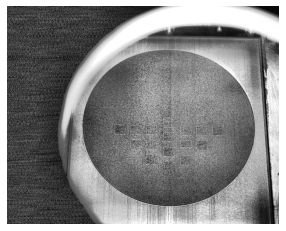

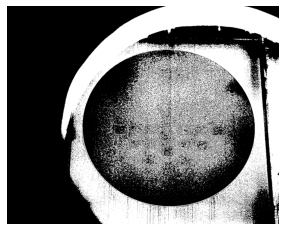

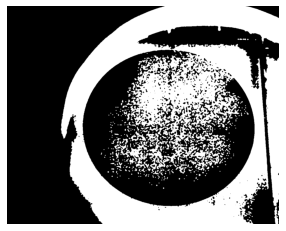

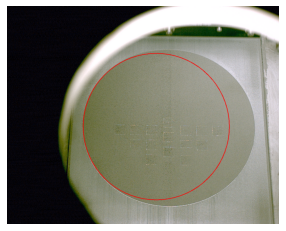

In [12]:
img = cv2.imread('input/extra_1.bmp')
extra_1_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(extra_1_gray,plt.cm.gray,vmin=0,vmax=255)
plt.axis('off')

# extra_1_gray[extra_1_gray > 220] = 0
# plt.figure()
# plt.imshow(extra_1_gray,plt.cm.gray,vmin=0,vmax=255)
# plt.axis('off')


# Find the contour of circular workspace in the image.
# plt.figure()
# plt.hist(extra_1_gray.flatten(), 255, density=False, facecolor='g')

clahe = cv2.createCLAHE(clipLimit=10.0, tileGridSize=(5, 5))
enhanced_image = clahe.apply(extra_1_gray)
plt.figure()
plt.imshow(enhanced_image,plt.cm.gray,vmin=0,vmax=255)
plt.axis('off')


# diff_image = cv2.subtract(enhanced_image, extra_1_gray)

# diff_image = cv2.equalizeHist(diff_image)

# plt.figure()
# plt.imshow(diff_image,plt.cm.gray,vmin=0,vmax=255)
# plt.axis('off')
# plt.figure()
# plt.hist(diff_image.flatten(), 255, density=False, facecolor='g')

# extra_1_edges = cv2.Canny(enhanced_image, 75, 125)
ret,extra_1_edges = cv2.threshold(enhanced_image,130,255,cv2.THRESH_BINARY)
# extra_1_edges = cv2.adaptiveThreshold(enhanced_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 15)
# extra_1_edges = cv2.adaptiveThreshold(enhanced_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plt.figure()
plt.imshow(extra_1_edges,plt.cm.gray,vmin=0,vmax=255)
plt.axis('off')
# extra_1_edges = cv2.medianBlur(extra_1_edges, ksize=3)
kernel = np.ones((3,3), np.uint8)
extra_1_edges = cv2.erode(extra_1_edges, kernel, iterations=1)
extra_1_edges = cv2.dilate(extra_1_edges, kernel, iterations=2)
extra_1_edges = cv2.medianBlur(extra_1_edges, ksize=5)
# extra_1_edges = cv2.morphologyEx(extra_1_edges, cv2.MORPH_CLOSE, kernel, iterations=1)
# extra_1_edges = cv2.medianBlur(extra_1_edges, ksize=7)
plt.figure()
plt.imshow(extra_1_edges,plt.cm.gray,vmin=0,vmax=255)
plt.axis('off')


# contours, hierarchy = cv2.findContours(extra_1_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# result = cv2.drawContours(img, contours, -1, (255, 0, 0), 2)
# plt.figure()
# plt.imshow(result,vmin=0,vmax=255)
# plt.axis('off')

circles = cv2.HoughCircles(extra_1_edges, cv2.HOUGH_GRADIENT, dp=1, minDist=2000, param1=50, param2=10, minRadius=300, maxRadius=1500)

if circles is not None:
    circles = np.uint16(np.around(circles))
    
    for circle in circles[0, :]:
        center = (circle[0], circle[1])
        radius = circle[2]
        cv2.circle(img, center, radius, (255, 0, 0), 2)

result = img
plt.figure()
plt.imshow(img,vmin=0,vmax=255)
plt.axis('off')
# save and print result
cv2.imwrite('output/extra_task1_cont.bmp', result)

In [ ]:
img = cv2.imread('input/extra_2.bmp')

# Find the contour of circular workspace in the image.

"""
Your code here
"""

# save and print result
cv2.imwrite('output/pad_task1_cont.bmp', result)

In [ ]:
img = cv2.imread('input/extra_3.bmp')

# Find the contour of circular workspace in the image.

"""
Your code here
"""

# save and print result
cv2.imwrite('output/pad_task1_cont.bmp', result)